<a href="https://colab.research.google.com/github/JARACH-209/DataAnalytics/blob/master/DataAnalysis_BostonHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigation to improve ML model by Exlporatory Data Analysis

## Dataset : Boston Housing Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import r2_score
import sklearn
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
import math
%matplotlib inline


boston_df = pd.DataFrame(load_boston().data,columns = load_boston().feature_names)

boston = sklearn.datasets.load_boston(return_X_y=False)
dataf = pd.DataFrame(boston.data)

y = load_boston().target
x = load_boston().data

boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
boston_df["Price"] = y
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston_df.corr('pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Let's explore top three features with highest correlation to the Price of a house in Boston.

In [40]:
temp = abs(boston_df.corr('pearson').Price).to_dict()
from collections import Counter
var = Counter(temp)
top_features = var.most_common(4)
del top_features[0]
print(top_features)

[('LSTAT', 0.7376627261740143), ('RM', 0.6953599470715389), ('PTRATIO', 0.507786685537561)]


### Top 3 factors that affect the price are :
* Percentage of low status population
* Numeber of Rooms in house
* Pupil-Teacher Ratio in town

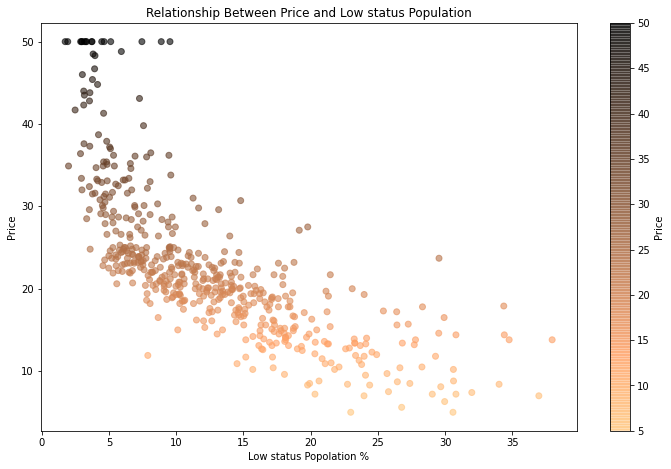

In [52]:
fig1,ax1 = plt.subplots()
fig1.set_size_inches(12,7.5)
ax1.set_ylabel('Price')
ax1.set_xlabel('Low status Popolation %')
ax1.set_title('Relationship Between Price and Low status Population')
c = boston_df['Price']
plt.scatter(boston_df.LSTAT, boston_df.Price, c=c, cmap = 'copper_r', alpha =0.6)  
cbar = plt.colorbar()
cbar.set_label('Price')

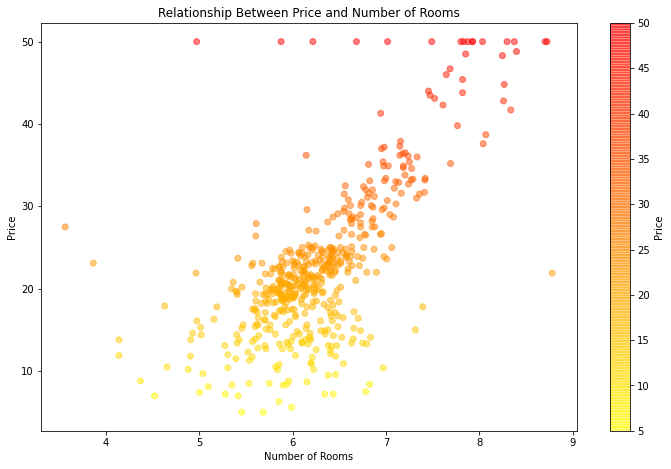

In [53]:
fig1,ax1 = plt.subplots()
fig1.set_size_inches(12,7.5)
ax1.set_ylabel('Price')
ax1.set_xlabel('Number of Rooms')
ax1.set_title('Relationship Between Price and Number of Rooms')
c = boston_df['Price']
plt.scatter(boston_df.RM, boston_df.Price,c=c, 
            cmap = 'autumn_r', alpha =0.5)  
cbar = plt.colorbar()
cbar.set_label('Price')

We can see a lot of outliers in this distribution which will affect our model

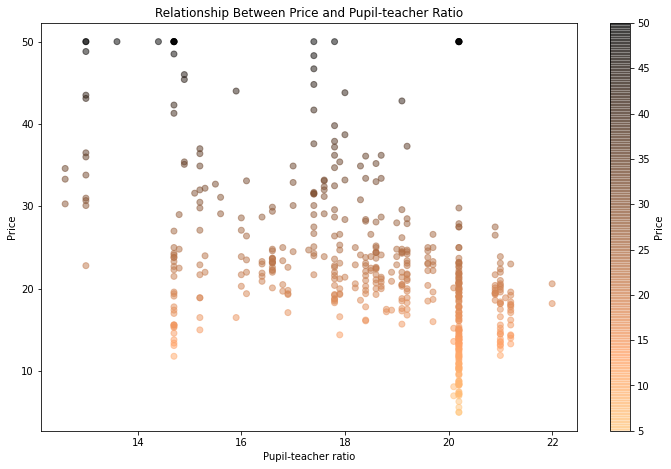

In [55]:
fig1,ax1 = plt.subplots()
fig1.set_size_inches(12,7.5)
ax1.set_ylabel('Price')
ax1.set_xlabel('Pupil-teacher ratio')
ax1.set_title('Relationship Between Price and Pupil-teacher Ratio')
c = boston_df['Price']
plt.scatter(boston_df.PTRATIO, boston_df.Price,c=c, 
            cmap = 'copper_r', alpha =0.5)  
cbar = plt.colorbar()
cbar.set_label('Price')

In [ ]:
#Train and Test set split into 80% and 20% respectively
x_train, x_rest, y_train, y_rest = train_test_split(x,y,test_size = .4,random_state =0)

#Rest of the 40% set split into equal parts of Train and Validation set 
x_test, x_val, y_test, y_val = train_test_split(x_train,y_train,test_size = .5,random_state = 0)

#Therefore : Train = 60%, Test = 20% and Validation = 20%
print(len(x_train),len(y_train))
print(len(x_val),len(y_val))
print(len(x_test),len(y_test))

In [ ]:
#preprocessing is necessary for SDG Regressor

scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
y_val = y_val.reshape(-1)

In [ ]:
clf_sdg = SGDRegressor(max_iter= 50000,eta0=0.0001,learning_rate='constant')
#learning rate is default = 0.01 as constant = eta0

clf_sdg.fit(x_train,y_train)

y_hat_test = clf_sdg.predict(x_test)
y_hat_val = clf_sdg.predict(x_val)
y_hat_train = clf_sdg.predict(x_train)

test_score = clf_sdg.score(x_test,y_test)
train_score = clf_sdg.score(x_train,y_train)
val_score = clf_sdg.score(x_val,y_val)

In [ ]:
print("R2-score Train: \t\t%.2f" % r2_score(y_hat_train , y_train) )
print("R2-score Test: \t\t\t%.2f" % r2_score(y_hat_test , y_test) )
print("R2-score Validation: \t\t%.2f" % r2_score(y_hat_val , y_val) )
print("------------------------------------")
print("Train score : \t\t\t%.2f"%train_score)
print("Test score : \t\t\t%.2f"%test_score)
print("Validation Score : \t\t%.2f"%val_score)

print("Mean Squared Error : ",math.sqrt(mean_squared_error(y_test,y_hat_test)))